### Crossovers

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_crossover(parent1, parent2, child1, child2, a, b, title=None):
    if title is None:
        title = "Crossover Visualization"

    def draw_row(ax, row, y, label, a, b, highlight_color="#97b83a"):
        for i, val in enumerate(row):
            color = highlight_color if a <= i < b else "white"
            rect = patches.Rectangle((i, y), 1, 1, edgecolor='black', facecolor=color)
            ax.add_patch(rect)
            ax.text(i + 0.5, y + 0.5, str(val), va='center', ha='center', fontsize=10)
        ax.text(-1.5, y + 0.5, label, va='center', ha='right', fontsize=12, fontweight='bold')

    size = len(parent1)
    fig, ax = plt.subplots(figsize=(size, 4))
    ax.set_xlim(-2, size)
    ax.set_ylim(0, 4)
    ax.axis('off')

    draw_row(ax, parent1, 3, "Parent 1", a, b)
    draw_row(ax, parent2, 2, "Parent 2", a, b)
    draw_row(ax, child1, 1, "Child 1", -1, -1)  
    draw_row(ax, child2, 0, "Child 2", -1, -1)

    ax.set_title(title, fontsize=14, pad=20)
    plt.tight_layout()
    plt.show()


=== Order Crossover ===
Parent 1: [1, 2, 3, 4, 5, 6, 7, 8]
Parent 2: [8, 7, 6, 5, 4, 3, 2, 1]
Crossover points: a=2, b=5
Segment copied from Parent 1 to Child 1: [3, 4, 5]
Segment copied from Parent 2 to Child 2: [6, 5, 4]
Child 1: [7, 6, 3, 4, 5, 2, 1, 8]
Child 2: [2, 3, 6, 5, 4, 7, 8, 1]


=== PMX Crossover ===
Parent 1: [1, 2, 3, 4, 5, 6, 7, 8]
Parent 2: [8, 7, 6, 5, 4, 3, 2, 1]
Crossover points: a=2, b=5
Segment copied from Parent 1 to Child 1: [3, 4, 5]
Segment copied from Parent 2 to Child 2: [6, 5, 4]
Child 1: [8, 7, 3, 4, 5, 6, 2, 1]
Child 2: [1, 2, 6, 5, 4, 3, 7, 8]




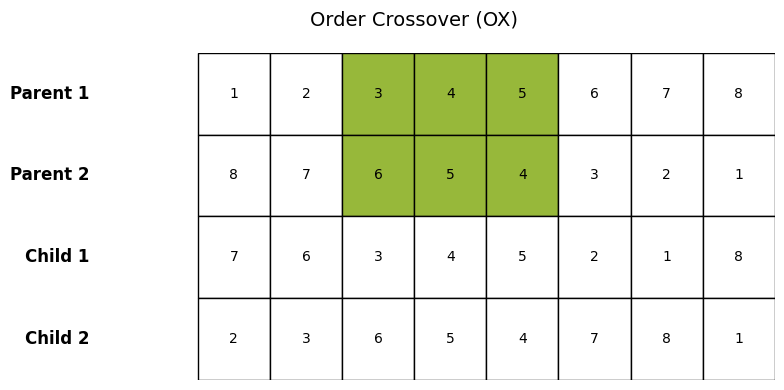

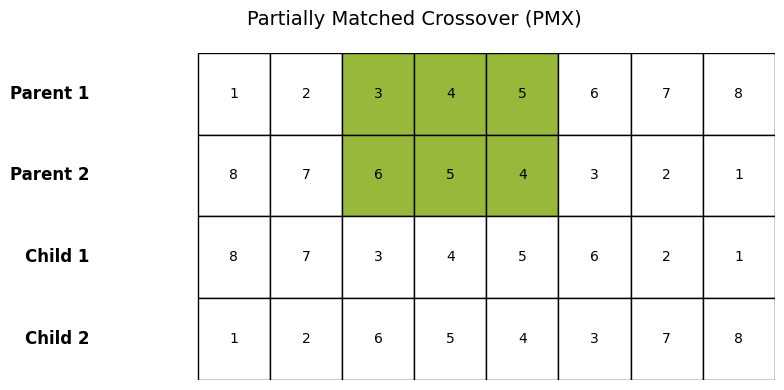

In [2]:
def print_crossover_details(parent1, parent2, child1, child2, a, b, method_name):
    print(f"=== {method_name} Crossover ===")
    print(f"Parent 1: {parent1}")
    print(f"Parent 2: {parent2}")
    print(f"Crossover points: a={a}, b={b}")
    print(f"Segment copied from Parent 1 to Child 1: {parent1[a:b]}")
    print(f"Segment copied from Parent 2 to Child 2: {parent2[a:b]}")
    print(f"Child 1: {child1}")
    print(f"Child 2: {child2}")
    print("\n")


parent1 = [1, 2, 3, 4, 5, 6, 7, 8]
parent2 = [8, 7, 6, 5, 4, 3, 2, 1]
a, b = 2, 5


def order_crossover(parent1, parent2, a, b):
    size = len(parent1)
    child1 = [None] * size
    child2 = [None] * size

    child1[a:b] = parent1[a:b]
    child2[a:b] = parent2[a:b]

    def fill_child(child, parent):
        pos = b
        for i in range(size):
            idx = (b + i) % size
            gene = parent[idx]
            if gene not in child:
                child[pos % size] = gene
                pos += 1

    fill_child(child1, parent2)
    fill_child(child2, parent1)

    return child1, child2


def pmx_crossover(parent1, parent2, a, b):
    size = len(parent1)
    child1 = [None] * size
    child2 = [None] * size

    child1[a:b] = parent1[a:b]
    child2[a:b] = parent2[a:b]

    def pmx_fill(child, parent, a, b):
        for i in range(a, b):
            gene = parent[i]
            if gene not in child:
                pos = i
                while True:
                    gene_in_child = child[pos]
                    pos = parent.index(gene_in_child)
                    if child[pos] is None:
                        child[pos] = gene
                        break
        for i in range(size):
            if child[i] is None:
                child[i] = parent[i]

    pmx_fill(child1, parent2, a, b)
    pmx_fill(child2, parent1, a, b)

    return child1, child2


ox_child1, ox_child2 = order_crossover(parent1, parent2, a, b)
print_crossover_details(parent1, parent2, ox_child1, ox_child2, a, b, "Order")


pmx_child1, pmx_child2 = pmx_crossover(parent1, parent2, a, b)
print_crossover_details(parent1, parent2, pmx_child1, pmx_child2, a, b, "PMX")

plot_crossover(parent1, parent2, ox_child1, ox_child2, a, b, title="Order Crossover (OX)")
plot_crossover(parent1, parent2, pmx_child1, pmx_child2, a, b, title="Partially Matched Crossover (PMX)")



### Mutations

In [12]:
import random

# Insertion Mutation: returns mutated individual and the moved indices
def insertion_mutation(individual):
    mutant = individual.copy()
    i, j = random.sample(range(len(mutant)), 2)
    gene = mutant.pop(i)
    mutant.insert(j, gene)
    return mutant, (i, j)

# Prime Slot Mutation: returns mutated individual and swapped indices
def prime_slot_mutation(representation, num_stages, num_slots):
    mutant = representation.copy()
    prime_indices = [stage * num_slots + (num_slots - 1) for stage in range(num_stages)]
    non_prime_indices = [i for i in range(len(mutant)) if i not in prime_indices]

    prime_idx = random.choice(prime_indices)
    non_prime_idx = random.choice(non_prime_indices)

    mutant[prime_idx], mutant[non_prime_idx] = mutant[non_prime_idx], mutant[prime_idx]
    return mutant, (prime_idx, non_prime_idx)

# Slot Shuffle Mutation: returns mutated individual and indices shuffled
def slot_shuffle_mutation(representation, num_stages, num_slots):
    slot = random.randint(0, num_slots - 1)
    indices = [stage * num_slots + slot for stage in range(num_stages)]
    values = [representation[i] for i in indices]

    random.shuffle(values)

    mutant = representation.copy()
    for i, idx in enumerate(indices):
        mutant[idx] = values[i]
    return mutant, indices



In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_mutation(original, mutated, mutation_type, highlight_indices=None):
    """
    Visualize a mutation from the original to the mutated individual.
    
    Parameters:
    - original: List[int], the original individual
    - mutated: List[int], the mutated individual
    - mutation_type: str, title of the mutation
    - highlight_indices: List[int], indices to highlight
    """
    size = len(original)
    fig, ax = plt.subplots(figsize=(size * 0.3, 2.5))
    ax.set_xlim(-1, size)
    ax.set_ylim(0, 2)
    ax.axis('off')

    def draw_row(y, row, label, highlights):
        for i, val in enumerate(row):
            color = "#97b83a" if highlights and i in highlights else "white"
            rect = patches.Rectangle((i, y), 1, 1, edgecolor='black', facecolor=color)
            ax.add_patch(rect)
            ax.text(i + 0.5, y + 0.5, str(val), ha='center', va='center', fontsize=9)
        ax.text(-1.5, y + 0.5, label, va='center', ha='right', fontsize=11, fontweight='bold')

    draw_row(1, original, "Original", highlight_indices)
    draw_row(0, mutated, "Mutated", highlight_indices)

    ax.set_title(mutation_type, fontsize=14, pad=20)
    plt.tight_layout()
    plt.show()


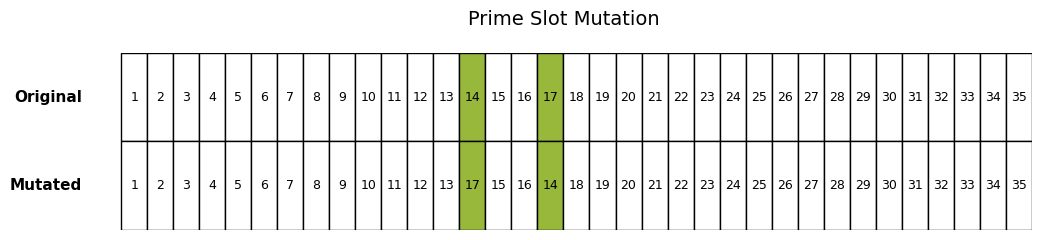

In [14]:
num_stages = 5
num_slots = 7
original = list(range(1, 36))
mutated, (prime_idx, non_prime_idx) = prime_slot_mutation(original, num_stages, num_slots)
plot_mutation(original, mutated, "Prime Slot Mutation", highlight_indices=[prime_idx, non_prime_idx])



[Prime Slot] Swapped indices 13 (prime) and 3 (non-prime)


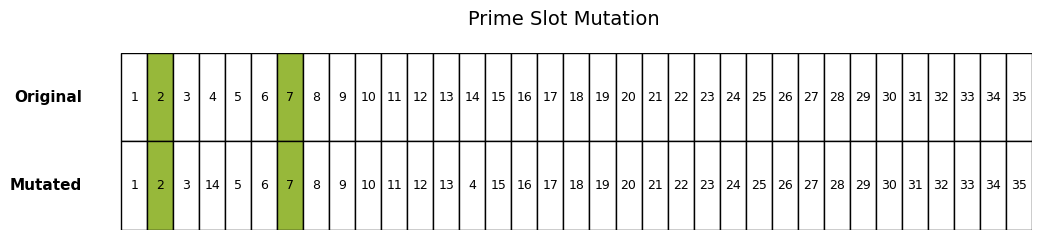

In [10]:
num_stages = 5
num_slots = 7
original = list(range(1, 36))
mutated = prime_slot_mutation(original.copy(), num_stages, num_slots)
# Get actual indices to highlight (use print debug or edit function to return them)
highlight_indices = [6, 1]  # For example
plot_mutation(original, mutated, "Prime Slot Mutation", highlight_indices)


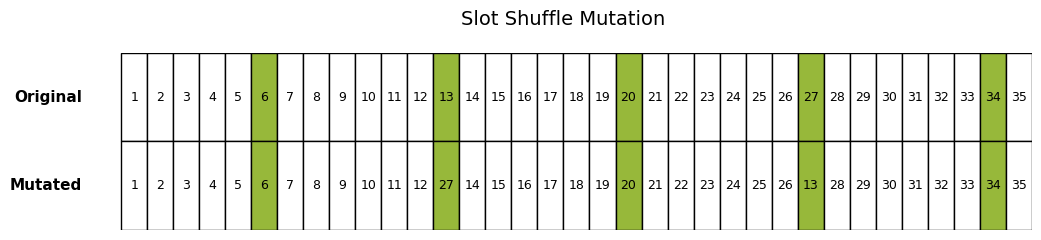

In [15]:
mutated, shuffled_indices = slot_shuffle_mutation(original, num_stages, num_slots)
plot_mutation(original, mutated, "Slot Shuffle Mutation", highlight_indices=shuffled_indices)

